# Battle of the Neighborhoods Week 4 and 5

### Introduction

Gurgaon, India, officially named Gurugram, is a city located in the northern Indian state of Haryana. It is situated near the Delhi-Haryana border, about 30 kilometres (19 mi) southwest of the national capital New Delhi and 268 km (167 mi) south of Chandigarh, the state capital.It is one of the major satellite cities of Delhi and is part of the National Capital Region of India. As of 2020, Gurgaon has a population of 3,100,632.

It has become a leading financial and banking centre in India after Mumbai and Chennai. The city's economic growth story started when the leading Indian automobile manufacturer Maruti Suzuki India Limited established a manufacturing plant in Gurgaon in the 1970s. Today, Gurgaon has local offices for more than 250 Fortune 500 companies and because of the highly diverse community the food industry has booming to extent to satisly all of its visitors and we are here to find out which locality is the best to stay in, the different types of restaurants present in each locality and we will visualize this data.

### Questions which will be answered in this notebook:

- Which is the best location in Gurgaon city to have South Indian food.
- Which areas have the best South Indian Restuarant Market.
- Which areas have a less number of restaurants.
- Which is the best place to stay if I prefer South Indian cuisine.
- What places have the best restaurants in Gurgaon.

### Data Required:

The data that we will be using in this project will be 

- All the restaurant data that is present in bangalore:
    - Data source: [Zomato Kaggle Dataset](https://www.kaggle.com/shrutimehta/zomato-restaurants-data)
    - Description : This dataset contain all the details of every restaurant in Gurgaon, we will use this dataset to explore all the localities in Gurgaon.
    
    
- Nearby places in each Locality in Gurgaon:
    - Data Source: [Foursquare API](https://developer.foursquare.com/)
    - Description : Using this API we will get all the venues in each neighborhood.

### Approach:

- Collect the data from [Zomato Kaggle Dataset](https://www.kaggle.com/shrutimehta/zomato-restaurants-data).
- Using the foursquare API, weill find the all the venues for each neighborhood
- Filter out all the venues which are nearby each locality.
- We will use the aggregative rating for each restaurant to find the best places.
- Finally we will visualize the Ranking of the Neighborhoods using the Folium Library.

In [1]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

     |████████████████████████████████| 92kB 4.5MB/s eta 0:00:011
     |████████████████████████████████| 102kB 16.9MB/s ta 0:00:01


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df_india = df[df['Country Code'] == 1]
df_ggaon = df_india[df_india['City'] == 'Gurgaon']
df_ggaon.reset_index(drop=True, inplace=True)
df_ggaon.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,18396451,K Lab,1,Gurgaon,"Shop GF-18, ILD Trade Centre, Sector 47, Near ...","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",77.039310,28.424831,"Cafe, Beverages",...,Indian Rupees(Rs.),No,No,No,No,1,3.4,Orange,Average,16
1,18237941,Pind Balluchi,1,Gurgaon,"112/112-A, 1st Floor, ILD Trade Centre, Near S...","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",77.039220,28.424913,"North Indian, Mughlai",...,Indian Rupees(Rs.),Yes,Yes,No,No,2,2.7,Orange,Average,80
2,2787,Punjab Grill,1,Gurgaon,"3rd Floor, Ambience Mall, Gurgaon","Ambience Mall, Gurgaon","Ambience Mall, Gurgaon, Gurgaon",77.097118,28.503077,"North Indian, Mughlai",...,Indian Rupees(Rs.),Yes,Yes,No,No,4,4.3,Green,Very Good,1887
3,3431,Zambar,1,Gurgaon,"3rd Floor, Ambience Mall, Gurgaon","Ambience Mall, Gurgaon","Ambience Mall, Gurgaon, Gurgaon",77.097185,28.502613,"South Indian, Seafood, Kerala",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.0,Green,Very Good,802
4,303699,Cakes & More,1,Gurgaon,"27, Ground Floor, Ansal Plaza Mall, Palam Viha...","Ansal Plaza Mall, Palam Vihar","Ansal Plaza Mall, Palam Vihar, Gurgaon",77.042009,28.511416,Bakery,...,Indian Rupees(Rs.),No,No,No,No,1,3.0,Orange,Average,4


In [4]:
df_Res= df_ggaon[df_ggaon.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]
df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
0,K Lab,"ILD Trade Centre Mall, Sohna Road",77.039310,28.424831,"Cafe, Beverages",3.4,Average,16
1,Pind Balluchi,"ILD Trade Centre Mall, Sohna Road",77.039220,28.424913,"North Indian, Mughlai",2.7,Average,80
2,Punjab Grill,"Ambience Mall, Gurgaon",77.097118,28.503077,"North Indian, Mughlai",4.3,Very Good,1887
3,Zambar,"Ambience Mall, Gurgaon",77.097185,28.502613,"South Indian, Seafood, Kerala",4.0,Very Good,802
4,Cakes & More,"Ansal Plaza Mall, Palam Vihar",77.042009,28.511416,Bakery,3.0,Average,4


In [5]:
Gurgaon_Rest = folium.Map(location=[28.45, 77.02], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(Gurgaon_Rest)  

Gurgaon_Rest

In [6]:
df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes,Cluster
0,K Lab,"ILD Trade Centre Mall, Sohna Road",77.039310,28.424831,"Cafe, Beverages",3.4,Average,16,2
1,Pind Balluchi,"ILD Trade Centre Mall, Sohna Road",77.039220,28.424913,"North Indian, Mughlai",2.7,Average,80,2
2,Punjab Grill,"Ambience Mall, Gurgaon",77.097118,28.503077,"North Indian, Mughlai",4.3,Very Good,1887,0
3,Zambar,"Ambience Mall, Gurgaon",77.097185,28.502613,"South Indian, Seafood, Kerala",4.0,Very Good,802,0
4,Cakes & More,"Ansal Plaza Mall, Palam Vihar",77.042009,28.511416,Bakery,3.0,Average,4,1


## Which places have the best restaurants in Gurgaon?

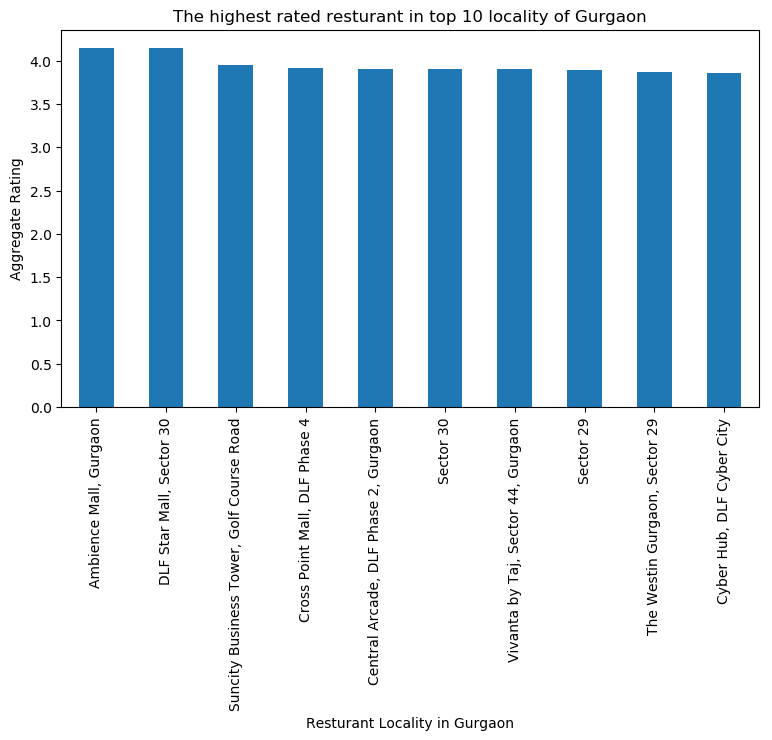

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturants in top 10 locality of Gurgaon')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

__Ambience Mall__ has the best rated restaurants in the city

## Which places have the worst restaurants in Gurgaon?

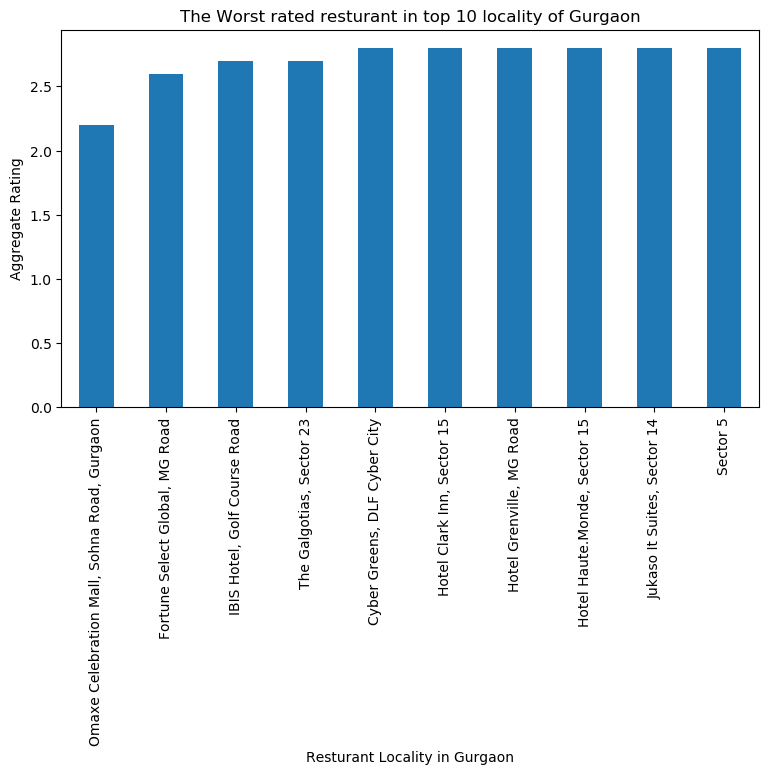

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of Gurgaon')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

__Omaxe Celebration Mall__ has the worst restaurants in the city

## Which is the best locality for a foodie to stay?

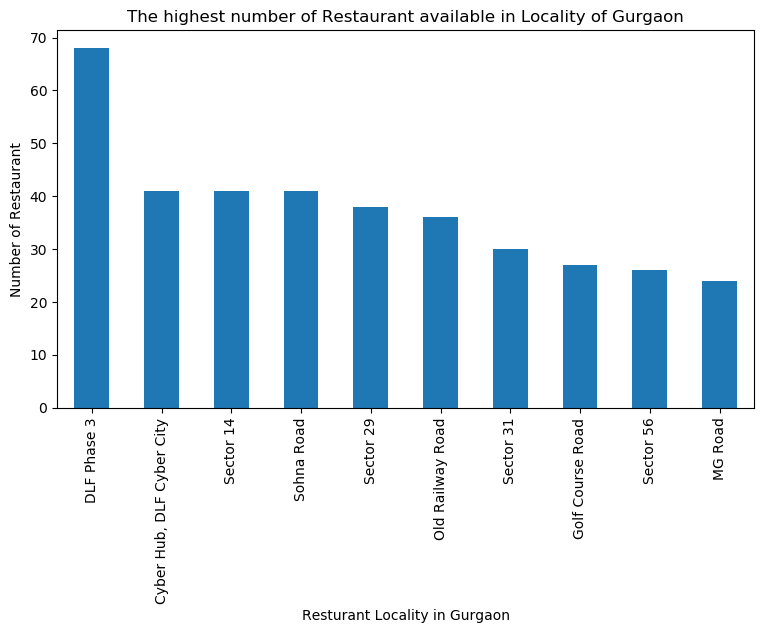

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of Gurgaon')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

__DLF Phase 3__ is the best place for a foodie to stay as there are quite a number of restaurants in that locality

## Which is not the best locality for a foodie to stay?

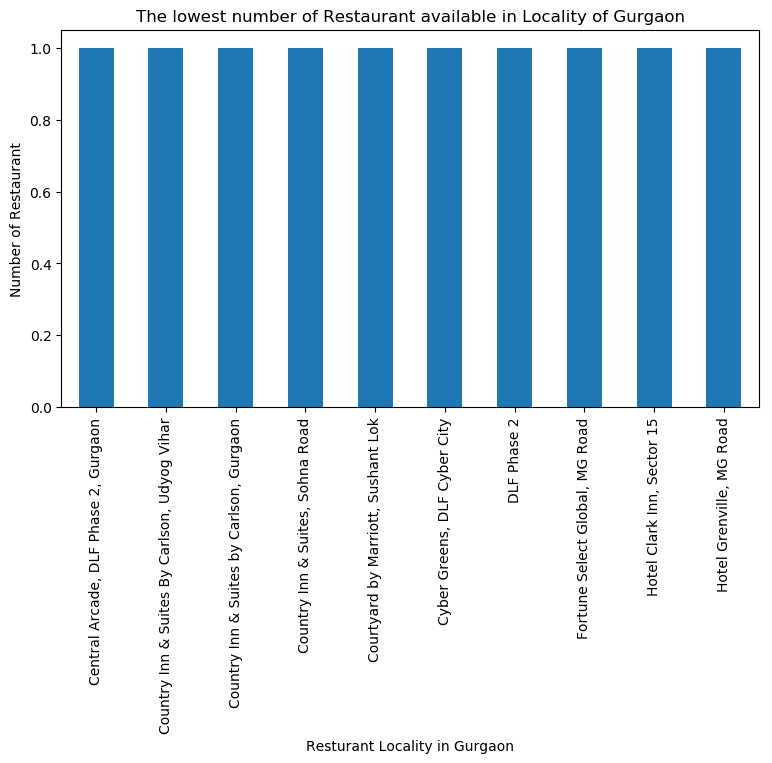

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of Gurgaon')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

__Central Arcade, DLF Phase 2__ is not the best place for a food to stay as there aren't that many restaurants in the locality.

## Which locality is the best area to to set up a South Indian Restaurant?

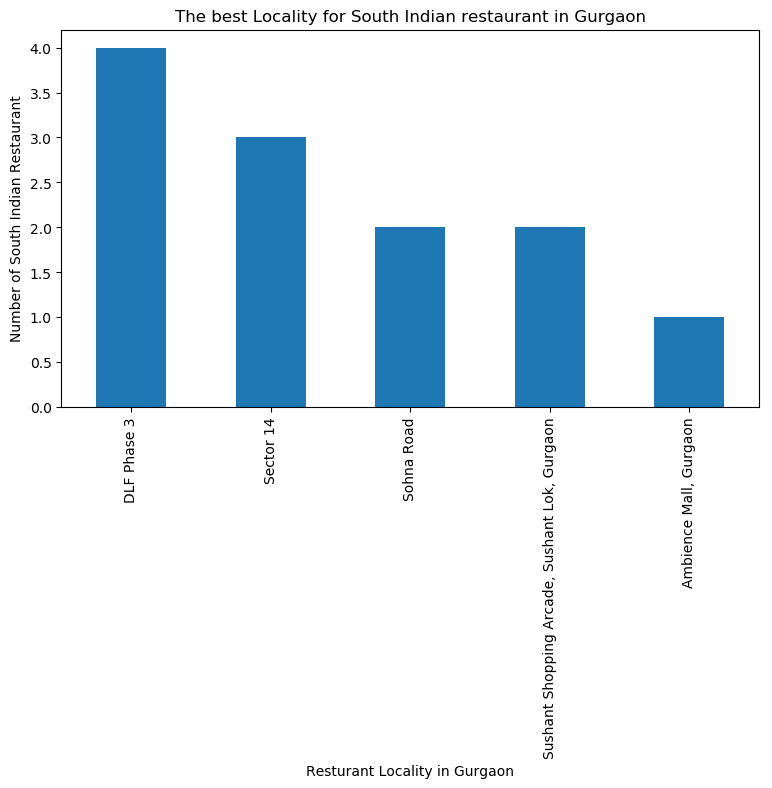

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for South Indian restaurant in Gurgaon')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('South Indian')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Number of South Indian Restaurant')

#displays the plot
plt.show()

__DLF Phase 3__ is the best place for a South Indian Restaurant

## Which places have the best South Indian Restaurants?

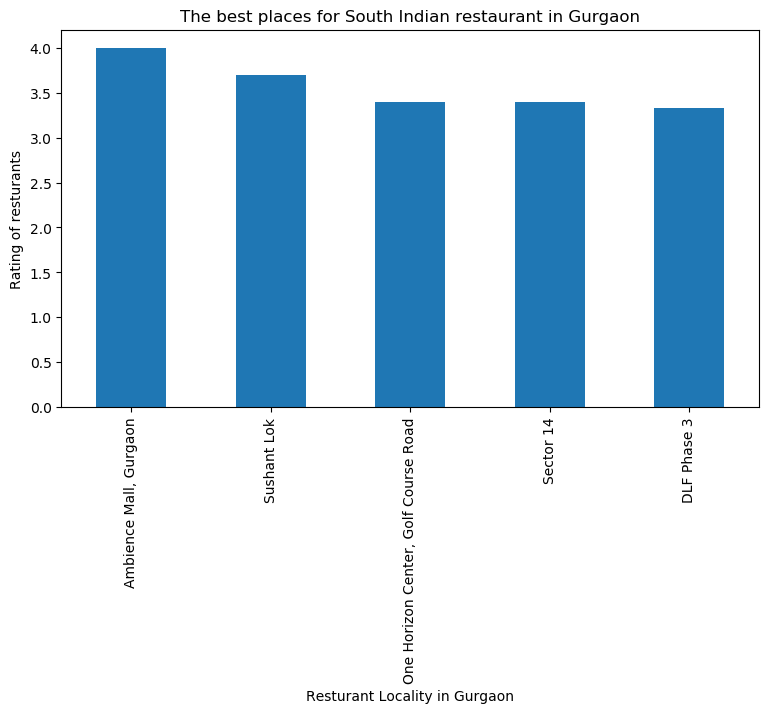

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for South Indian restaurant in Gurgaon')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('South Indian')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

__Ambience Mall__ has the best South Indian Restaurants 

### Data Transformation

Grouping the data based on the locality and creating a dataframe

In [14]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,2,"Cafe, Beverages, North Indian, Mughlai",3.05,Average,96
1,"Ambience Mall, Gurgaon",28.502845,77.097152,2,"North Indian, Mughlai, South Indian, Seafood, ...",4.15,Very Good,2689
2,"Ansal Plaza Mall, Palam Vihar",28.511460,77.041994,3,"Bakery, Ice Cream, Chinese",3.00,Average,19
3,Ardee City,28.441660,77.083050,3,"Japanese, Thai, Chinese, Pizza, Desserts, Raw ...",3.00,Average,65
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",28.458165,77.034839,2,"Japanese, North Indian, Chinese, Continental",2.85,Average,28


In [15]:
df_final.shape

(110, 8)

## Define your Foursquare Credentials and the Respective Version

In [16]:
## Define Foursquare Credentials and Version
CLIENT_ID = '3VMFMI1H2CN0ACZBGVLD2NUOQOV525QVCKIOUG4PBVB2M0DY' # ID
CLIENT_SECRET = 'UZJTU3H51E23SIIBVNAVX3EWMGSLHZAZ2FABJNBM45MEKVMD' # Secret
VERSION = '20200503' # API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3VMFMI1H2CN0ACZBGVLD2NUOQOV525QVCKIOUG4PBVB2M0DY
CLIENT_SECRET:UZJTU3H51E23SIIBVNAVX3EWMGSLHZAZ2FABJNBM45MEKVMD


## Creating a function to repeat the same process for all the localities in Gurgaon

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
# find the venues the entire city of Gurgaon
Gurgaon_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

 ILD Trade Centre Mall, Sohna Road
Ambience Mall, Gurgaon
Ansal Plaza Mall, Palam Vihar
Ardee City
Best Western Skycity Hotel, Sector 15, Gurgaon
Central Arcade, DLF Phase 2, Gurgaon
Central Plaza Mall, Golf Course Road
Country Inn & Suites By Carlson, Udyog Vihar
Country Inn & Suites by Carlson, Gurgaon
Country Inn & Suites by Carlson, Sector 12
Country Inn & Suites, Sohna Road
Courtyard by Marriott, Sushant Lok
Cross Point Mall, DLF Phase 4
Crowne Plaza, Sector 29
Cyber Greens, DLF Cyber City
Cyber Hub, DLF Cyber City
DLF Cyber City
DLF Galleria, DLF Phase 4
DLF Mega Mall, DLF Phase 1
DLF Phase 1
DLF Phase 2
DLF Phase 3
DLF Phase 4
DLF Phase 5
DLF South Point Mall, Golf Course Road
DLF Star Mall, Sector 30
DT City Centre Mall, MG Road
DT Mega Mall, DLF Phase 1
DoubleTree by Hilton, Sector 56
Fortune Select Excalibur, Sohna Road
Fortune Select Global, MG Road
Global Foyer Mall, Golf Course Road
Golf Course Road
Hong Kong Bazaar Mall, Sector 57, Gurgaon
Hotel Clark Inn, Sector 15
Hotel

In [19]:
Gurgaon_venues.head()

,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Brewer Street,28.424499,77.039134,Brewery
1,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Decathlon Gurgaon,28.427433,77.036258,Sporting Goods Shop
2,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,KFC,28.424789,77.038722,Fast Food Restaurant
3,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Sagar Ratna,28.421042,77.038509,Indian Restaurant
4,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Grand cinemas,28.423626,77.039422,Movie Theater


In [20]:
Gurgaon_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
"ILD Trade Centre Mall, Sohna Road",10,10,10,10,10,10
"Ambience Mall, Gurgaon",41,41,41,41,41,41
"Ansal Plaza Mall, Palam Vihar",3,3,3,3,3,3
Ardee City,4,4,4,4,4,4
"Best Western Skycity Hotel, Sector 15, Gurgaon",5,5,5,5,5,5
"Central Arcade, DLF Phase 2, Gurgaon",22,22,22,22,22,22
"Central Plaza Mall, Golf Course Road",13,13,13,13,13,13
"Country Inn & Suites By Carlson, Udyog Vihar",10,10,10,10,10,10
"Country Inn & Suites by Carlson, Gurgaon",11,11,11,11,11,11


In [21]:
print('There are {} uniques categories.'.format(len(Gurgaon_venues['Venue Category'].unique())))

There are 129 uniques categories.


In [22]:
## Analyze Each Locality

# one hot encoding
Gurgaon_onehot = pd.get_dummies(Gurgaon_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
Gurgaon_onehot['Locality'] = Gurgaon_venues['Locality'] 

# move Locality column to the first column
column_list = Gurgaon_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
Gurgaon_onehot = Gurgaon_onehot[column_list]

Gurgaon_onehot.head()

,Locality,ATM,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,...,Supermarket,Tapas Restaurant,Tea Room,Thai Restaurant,Tibetan Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar
0,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
Gurgaon_grouped = Gurgaon_onehot.groupby('Locality').mean().reset_index()
Gurgaon_grouped

,Locality,ATM,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,...,Supermarket,Tapas Restaurant,Tea Room,Thai Restaurant,Tibetan Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar
0,"ILD Trade Centre Mall, Sohna Road",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
1,"Ambience Mall, Gurgaon",0.0,0.048780,0.024390,0.000000,0.048780,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2,"Ansal Plaza Mall, Palam Vihar",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
3,Ardee City,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.250000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",0.0,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
5,"Central Arcade, DLF Phase 2, Gurgaon",0.0,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
6,"Central Plaza Mall, Golf Course Road",0.0,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
7,"Country Inn & Suites By Carlson, Udyog Vihar",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
8,"Country Inn & Suites by Carlson, Gurgaon",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
9,"Country Inn & Suites by Carlson, Sector 12",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000


In [24]:
Gurgaon_grouped.shape

(109, 130)

In [25]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in Gurgaon_grouped['Locality']:
    print("----"+hood+"----")
    temp = Gurgaon_grouped[Gurgaon_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- ILD Trade Centre Mall, Sohna Road----
                  venue  freq
0               Brewery   0.2
1         Movie Theater   0.2
2             BBQ Joint   0.1
3  Fast Food Restaurant   0.1
4        Shop & Service   0.1


----Ambience Mall, Gurgaon----
                  venue  freq
0     Indian Restaurant  0.15
1  Fast Food Restaurant  0.07
2    Italian Restaurant  0.07
3        Clothing Store  0.07
4      Asian Restaurant  0.05


----Ansal Plaza Mall, Palam Vihar----
           venue  freq
0    Pizza Place  0.33
1           Café  0.33
2           Food  0.33
3            ATM  0.00
4  Movie Theater  0.00


----Ardee City----
               venue  freq
0        Beer Garden  0.25
1  Indian Restaurant  0.25
2  Convenience Store  0.25
3    Thai Restaurant  0.25
4                ATM  0.00


----Best Western Skycity Hotel, Sector 15, Gurgaon----
                            venue  freq
0                           Hotel   0.6
1                  Farmers Market   0.2
2                Asian Res

In [26]:
# Put all the above values into a pandas dataframe
# We write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [27]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = Gurgaon_grouped['Locality']

for ind in np.arange(Gurgaon_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Gurgaon_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"ILD Trade Centre Mall, Sohna Road",Brewery,Movie Theater,Sporting Goods Shop,Department Store,Fast Food Restaurant,BBQ Joint,Indian Restaurant,Shop & Service,Food,Flea Market
1,"Ambience Mall, Gurgaon",Indian Restaurant,Clothing Store,Fast Food Restaurant,Italian Restaurant,Asian Restaurant,Shopping Mall,Multiplex,Bar,American Restaurant,Café
2,"Ansal Plaza Mall, Palam Vihar",Pizza Place,Café,Food,Food & Drink Shop,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner
3,Ardee City,Convenience Store,Beer Garden,Thai Restaurant,Indian Restaurant,Donut Shop,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",Hotel,Asian Restaurant,Farmers Market,Wine Bar,Electronics Store,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant,Diner
5,"Central Arcade, DLF Phase 2, Gurgaon",Department Store,Indian Restaurant,Shopping Mall,Donut Shop,Pizza Place,Gym,Coffee Shop,Clothing Store,Café,Fast Food Restaurant
6,"Central Plaza Mall, Golf Course Road",Chinese Restaurant,Italian Restaurant,Falafel Restaurant,Café,American Restaurant,Sandwich Place,Diner,Ice Cream Shop,Wine Bar,Flea Market
7,"Country Inn & Suites By Carlson, Udyog Vihar",Clothing Store,Hotel,Cosmetics Shop,Fast Food Restaurant,Campground,Donut Shop,Flea Market,Farmers Market,Falafel Restaurant,Electronics Store
8,"Country Inn & Suites by Carlson, Gurgaon",Hotel,Japanese Restaurant,Go Kart Track,Resort,Café,Wine Bar,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
9,"Country Inn & Suites by Carlson, Sector 12",Hotel,Indian Restaurant,Wine Bar,Electronics Store,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Diner


In [28]:
## Cluster Locality
## Now we run k-means to cluster the Locality into 5 clusters.
## First we set number of clusters

kclusters = 5

Gurgaon_clustering = Gurgaon_grouped.drop('Locality', 1)

# Run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Gurgaon_clustering)

# Check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(109,)

In [29]:
# Add clustering labels
Gurgaon_merged = df_final.head(109)
Gurgaon_merged['Cluster Labels'] = kmeans.labels_

# Merge Gurgaon_grouped with df_South_Indian to add latitude/longitude for each Locality
Gurgaon_merged = Gurgaon_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

Gurgaon_merged.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,2,"Cafe, Beverages, North Indian, Mughlai",3.05,Average,96,2,Brewery,Movie Theater,Sporting Goods Shop,Department Store,Fast Food Restaurant,BBQ Joint,Indian Restaurant,Shop & Service,Food,Flea Market
1,"Ambience Mall, Gurgaon",28.502845,77.097152,2,"North Indian, Mughlai, South Indian, Seafood, ...",4.15,Very Good,2689,2,Indian Restaurant,Clothing Store,Fast Food Restaurant,Italian Restaurant,Asian Restaurant,Shopping Mall,Multiplex,Bar,American Restaurant,Café
2,"Ansal Plaza Mall, Palam Vihar",28.511460,77.041994,3,"Bakery, Ice Cream, Chinese",3.00,Average,19,4,Pizza Place,Café,Food,Food & Drink Shop,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner
3,Ardee City,28.441660,77.083050,3,"Japanese, Thai, Chinese, Pizza, Desserts, Raw ...",3.00,Average,65,2,Convenience Store,Beer Garden,Thai Restaurant,Indian Restaurant,Donut Shop,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",28.458165,77.034839,2,"Japanese, North Indian, Chinese, Continental",2.85,Average,28,1,Hotel,Asian Restaurant,Farmers Market,Wine Bar,Electronics Store,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant,Diner


In [30]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Gurgaon_merged['Lat'], Gurgaon_merged['Lng'], Gurgaon_merged['Locality'], Gurgaon_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [32]:
## Examine Clusters

## Cluster 1
Gurgaon_merged.loc[Gurgaon_merged['Cluster Labels'] == 0, Gurgaon_merged.columns[[1] + list(range(5, Gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,28.422147,3.500000,"Average, Good",110,0,Gym / Fitness Center,Hotel Bar,Moroccan Restaurant,Asian Restaurant,Gift Shop,Hotel,Dessert Shop,Dhaba,Dim Sum Restaurant,Food & Drink Shop
36,28.455392,2.800000,Average,19,0,Food Court,Hotel,Snack Place,Electronics Store,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Wine Bar
52,28.467180,3.091667,"Average, Good",587,0,Convenience Store,Snack Place,Dessert Shop,Chinese Restaurant,Indian Restaurant,Electronics Store,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
59,28.477707,3.000000,Average,21,0,Shopping Mall,Breakfast Spot,Hotel,Asian Restaurant,Hotel Bar,Fast Food Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Falafel Restaurant
76,28.448021,3.433333,"Average, Very Good",361,0,Gym / Fitness Center,Arcade,Park,Food Truck,Shopping Mall,Wine Bar,Electronics Store,Flea Market,Fast Food Restaurant,Farmers Market
78,28.480284,2.800000,Average,16,0,Furniture / Home Store,Plaza,Pharmacy,Snack Place,Juice Bar,Flea Market,Italian Restaurant,Donut Shop,Farmers Market,Falafel Restaurant
81,28.425521,3.003846,"Average, Good, Poor",576,0,Asian Restaurant,Indian Restaurant,Gym / Fitness Center,Lounge,Hotel,Hotel Bar,Cable Car,Bakery,Moroccan Restaurant,Snack Place
83,28.468027,3.240000,"Average, Good",431,0,Convenience Store,Multiplex,Snack Place,Food Truck,Bakery,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop
87,28.431410,2.900000,Average,49,0,Snack Place,Park,Wine Bar,Donut Shop,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Diner
93,28.478213,3.000000,Average,4,0,Shopping Mall,Breakfast Spot,Hotel,Asian Restaurant,Hotel Bar,Fast Food Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Falafel Restaurant


In [33]:
## Cluster 2
Gurgaon_merged.loc[Gurgaon_merged['Cluster Labels'] == 1, Gurgaon_merged.columns[[1] + list(range(5, Gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,28.458165,2.8500,Average,28,1,Hotel,Asian Restaurant,Farmers Market,Wine Bar,Electronics Store,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant,Diner
8,28.461988,3.8000,Good,91,1,Hotel,Japanese Restaurant,Go Kart Track,Resort,Café,Wine Bar,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
9,28.468385,3.2500,"Average, Good",44,1,Hotel,Indian Restaurant,Wine Bar,Electronics Store,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Diner
10,28.334942,3.4000,Average,19,1,Hotel,Wine Bar,Food Court,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store
34,28.457610,2.8000,Average,7,1,Hotel,Asian Restaurant,Farmers Market,Wine Bar,Electronics Store,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant,Diner
35,28.465600,2.8000,Average,15,1,Hotel,Wine Bar,Food Court,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store
45,28.470510,3.0000,Average,35,1,Hotel,Indian Restaurant,Wine Bar,Electronics Store,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Diner
57,28.459079,3.2000,Average,13,1,Hotel,Market,Farmers Market,Wine Bar,Electronics Store,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant,Donut Shop
62,28.449740,3.5000,Good,194,1,Hotel,Gym,Snack Place,Donut Shop,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Diner
67,28.457396,2.9600,Average,99,1,Hotel,Department Store,Asian Restaurant,Wine Bar,Electronics Store,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [34]:
## Cluster 3
Gurgaon_merged.loc[Gurgaon_merged['Cluster Labels'] == 2, Gurgaon_merged.columns[[1] + list(range(5, Gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,28.424872,3.050000,Average,96,2,Brewery,Movie Theater,Sporting Goods Shop,Department Store,Fast Food Restaurant,BBQ Joint,Indian Restaurant,Shop & Service,Food,Flea Market
1,28.502845,4.150000,Very Good,2689,2,Indian Restaurant,Clothing Store,Fast Food Restaurant,Italian Restaurant,Asian Restaurant,Shopping Mall,Multiplex,Bar,American Restaurant,Café
3,28.441660,3.000000,Average,65,2,Convenience Store,Beer Garden,Thai Restaurant,Indian Restaurant,Donut Shop,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
5,28.480759,3.900000,Good,415,2,Department Store,Indian Restaurant,Shopping Mall,Donut Shop,Pizza Place,Gym,Coffee Shop,Clothing Store,Café,Fast Food Restaurant
13,28.468424,3.800000,Good,312,2,Brewery,Indian Restaurant,Café,Chinese Restaurant,Fast Food Restaurant,Bar,Korean Restaurant,Park,Nightclub,Diner
14,28.493723,2.800000,Average,191,2,Indian Restaurant,Coffee Shop,Café,Fast Food Restaurant,Bar,Pizza Place,Asian Restaurant,Donut Shop,Mediterranean Restaurant,Food Court
15,28.495004,3.860976,"Average, Excellent, Good, Poor, Very Good",36185,2,Indian Restaurant,Coffee Shop,Café,Fast Food Restaurant,Asian Restaurant,Pizza Place,Bar,Italian Restaurant,Mexican Restaurant,Donut Shop
16,28.492075,3.460000,"Average, Good, Poor, Very Good",1241,2,Indian Restaurant,Café,Coffee Shop,Fast Food Restaurant,Bar,Pizza Place,Mediterranean Restaurant,Lounge,Asian Restaurant,Donut Shop
18,28.475867,3.007143,"Average, Good, Poor",1033,2,Fast Food Restaurant,Multiplex,Brewery,Spa,Pizza Place,Coffee Shop,Clothing Store,Restaurant,Indian Restaurant,Bakery
19,28.472881,3.352174,"Average, Excellent, Good",2651,2,Fast Food Restaurant,Multiplex,Brewery,Metro Station,Restaurant,Electronics Store,Bakery,Clothing Store,Coffee Shop,Pizza Place


In [35]:
## Cluster 4
Gurgaon_merged.loc[Gurgaon_merged['Cluster Labels'] == 3, Gurgaon_merged.columns[[1] + list(range(5, Gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
84,28.454245,3.00,Average,20,3,Indian Restaurant,Electronics Store,Wine Bar,Food Court,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop
100,28.239367,3.55,"Average, Good",67,3,Indian Restaurant,Wine Bar,Food Court,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store


In [36]:
## Cluster 5
Gurgaon_merged.loc[Gurgaon_merged['Cluster Labels'] == 4, Gurgaon_merged.columns[[1] + list(range(5, Gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,28.511460,3.000000,Average,19,4,Pizza Place,Café,Food,Food & Drink Shop,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner
6,28.443040,3.500000,"Average, Good, Very Good",1214,4,Chinese Restaurant,Italian Restaurant,Falafel Restaurant,Café,American Restaurant,Sandwich Place,Diner,Ice Cream Shop,Wine Bar,Flea Market
7,28.509225,3.500000,Good,32,4,Clothing Store,Hotel,Cosmetics Shop,Fast Food Restaurant,Campground,Donut Shop,Flea Market,Farmers Market,Falafel Restaurant,Electronics Store
11,28.460925,3.200000,Average,6,4,Hotel,Indian Restaurant,Hotel Bar,Bar,Chinese Restaurant,Restaurant,Dessert Shop,Fast Food Restaurant,Café,Sandwich Place
12,28.468311,3.912500,"Good, Very Good",1841,4,Café,Indian Restaurant,Bakery,Italian Restaurant,Sandwich Place,Coffee Shop,Beer Garden,Burger Joint,Restaurant,Market
17,28.467327,3.582353,"Average, Good, Poor, Very Good",3208,4,Café,Indian Restaurant,Bakery,Italian Restaurant,Sandwich Place,Coffee Shop,Beer Garden,Burger Joint,Restaurant,Market
22,28.466065,3.804762,"Average, Good, Very Good",3414,4,Café,Restaurant,Italian Restaurant,Indian Restaurant,Bakery,Coffee Shop,Beer Garden,Market,Sandwich Place,Fast Food Restaurant
23,28.448633,3.675000,"Average, Good",214,4,Coffee Shop,Shopping Mall,Gym / Fitness Center,Whisky Bar,Italian Restaurant,Japanese Restaurant,Food & Drink Shop,Lounge,Nightclub,Pizza Place
24,28.447905,3.706667,"Average, Good, Very Good",2920,4,Italian Restaurant,Gourmet Shop,Whisky Bar,Falafel Restaurant,Pizza Place,Chinese Restaurant,Lounge,Café,Food & Drink Shop,Japanese Restaurant
25,28.461636,4.150000,Very Good,306,4,Bakery,Tea Room,Restaurant,Smoke Shop,Pool,Multiplex,Chinese Restaurant,Brewery,Hotel,Coffee Shop


### Conclusion

1. DLF Phase 3, Sector 14 and Sohna road are the best localities to set up a South Indian Restaurant.
2. Ambience Mall, Sushant Lok and One Horizon Center, Golf course Road have the best South Indian Restaurants.
3. DLF Phase 3, Cyber Hub,DLF Cyber City and Sector 14 are the best places for a foodie to stay.
4. Ambience Mall, DLF Star Mall,Sector 30 and Sun City Business Toer,Golf Course Road have the top rated restaurants.

#### Cluster 1 is best for Snacks and Fitness Food
#### Cluster 2 is best for Hotels and Bars 
#### Cluster 3 is best for Indian and Fast Food
#### Cluster 4 is best for Indian Food
#### Cluster 5 is best for Cafés